# IMPORTING NECESSARY PACKAGES AND LIBRARIES

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
import tensorflow as tf
import cv2

import matplotlib.pyplot as plt
import numpy as np
import random
import h5py
from PIL import Image

from numpy import asarray

In [3]:
#os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [4]:
import tensorflow as tf
from tensorflow.python.client import device_lib

print("GPU's: ",len(tf.config.experimental.list_physical_devices('GPU')))
device_lib.list_local_devices()

GPU's:  0


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 4671544067386728174]

In [5]:
tf.test.is_built_with_cuda()

True

# Reading the image

In [7]:
img_array = cv2.imread('Training/0/Training_10118481.jpg')

# Printing image shape

In [8]:
img_array.shape

(48, 48, 3)

# Printing image

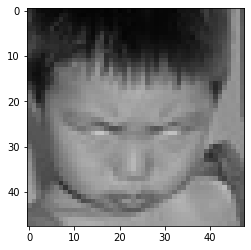

In [9]:
plt.imshow(img_array)

# Training Dataset Directory

In [10]:
DataDirectory = "Training/"  
TestDirectory = "Testing/"

# list of classes

In [11]:
Classes = ['0','1','2','3','4','5','6'] 

# Iterating through each iamge and storing in a array and displaying too

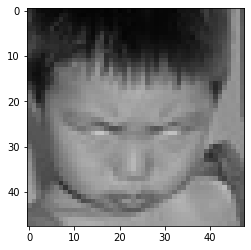

In [12]:
for category in Classes:
    path = os.path.join(DataDirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

# Resizing the image of (48,48,3) to (224,224,3) cause that format is needed in transfer learning in next steps

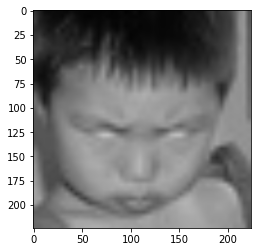

In [13]:
img_size = 224
new_array = cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

# Reading all the images and converting them to array for train and test data

In [14]:
def normalize(x):
    return x / 255

In [15]:
training_data_angry = []
training_data_disgust = []
training_data_fear = []
training_data_happy = []
training_data_neutral = []
training_data_sad = []
training_data_surprise = []

def create_training_data(category):
    ctr = 0
    path = os.path.join(DataDirectory, category)
    class_num = Classes.index(category)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path,img))
            new_array = cv2.resize(img_array,(img_size,img_size))
            #new_array = normalize(new_array)
            ctr += 1
            if(class_num == 0):
                training_data_angry.append([new_array,class_num])
            elif(class_num == 1):
                training_data_disgust.append([new_array,class_num])
            elif(class_num == 2):
                training_data_fear.append([new_array,class_num])
            elif(class_num == 3):
                training_data_happy.append([new_array,class_num])
            elif(class_num == 4):
                training_data_neutral.append([new_array,class_num])
            elif(class_num == 5):
                training_data_sad.append([new_array,class_num])
            elif(class_num == 6):
                training_data_surprise.append([new_array,class_num])
        except Exception as e:
            pass
        #if(ctr == 1000):
         #   return 

In [16]:
testing_data_angry = []
testing_data_disgust = []
testing_data_fear = []
testing_data_happy = []
testing_data_neutral = []
testing_data_sad = []
testing_data_surprise = []

def create_testing_data(category):
    ctr1 = 0
    path = os.path.join(TestDirectory, category)
    class_num = Classes.index(category)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path,img))
            new_array = cv2.resize(img_array,(img_size,img_size))
            #new_array = normalize(new_array)
            ctr1 += 1
            if(class_num == 0):
                testing_data_angry.append([new_array,class_num])
            elif(class_num == 1):
                testing_data_disgust.append([new_array,class_num])
            elif(class_num == 2):
                testing_data_fear.append([new_array,class_num])
            elif(class_num == 3):
                testing_data_happy.append([new_array,class_num])
            elif(class_num == 4):
                testing_data_neutral.append([new_array,class_num])
            elif(class_num == 5):
                testing_data_sad.append([new_array,class_num])
            elif(class_num == 6):
                testing_data_surprise.append([new_array,class_num])
        except Exception as e:
            pass
        #if(ctr1 == 250):
         #   return 

# Calling Function

In [17]:
create_training_data('0')
create_training_data('1')
create_training_data('2')
create_training_data('3')
create_training_data('4')
create_training_data('5')
create_training_data('6')

In [18]:
create_testing_data('0')
create_testing_data('1')
create_testing_data('2')
create_testing_data('3')
create_testing_data('4')
create_testing_data('5')
create_testing_data('6')

# Length of training data and test data

In [19]:
print(len(training_data_angry))
print(len(training_data_disgust))
print(len(training_data_fear))
print(len(training_data_happy))
print(len(training_data_neutral))
print(len(training_data_sad))
print(len(training_data_surprise))

3995
436
4097
7215
4965
4830
3171


In [20]:
print(len(testing_data_angry))
print(len(testing_data_disgust))
print(len(testing_data_fear))
print(len(testing_data_happy))
print(len(testing_data_neutral))
print(len(testing_data_sad))
print(len(testing_data_surprise))

958
111
1024
1774
1233
1247
831


# Merging all data into one array

In [21]:
training_data = []
training_data.extend(training_data_angry)
training_data.extend(training_data_disgust)
training_data.extend(training_data_fear)
training_data.extend(training_data_happy)
training_data.extend(training_data_neutral)
training_data.extend(training_data_sad)
training_data.extend(training_data_surprise)
print(len(training_data))

28709


In [22]:
testing_data = []
testing_data.extend(testing_data_angry)
testing_data.extend(testing_data_disgust)
testing_data.extend(testing_data_fear)
testing_data.extend(testing_data_happy)
testing_data.extend(testing_data_neutral)
testing_data.extend(testing_data_sad)
testing_data.extend(testing_data_surprise)
print(len(testing_data))

7178


# Shuffling the dataset so that the model does not learn sequence and be more robust

In [23]:
random.shuffle(training_data)
random.shuffle(testing_data)

# Printing shape of training and testing data => numpy array shape

In [24]:
print(np.array(training_data,dtype=object).shape)
print(np.array(testing_data,dtype=object).shape)

(28709, 2)
(7178, 2)


# Extracting X and y i.e., features and labels from dataset

In [25]:
X = [] # data / feature
y = [] # Label

for features,label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, img_size, img_size, 3) # reshaping it to 4 dimensional cause its needed like that for further steps
                                                   # The significance of -1 is that it will take count of total images here or 
                                                   # we can say for a image its 1
                                                   # -1 is used when we dont know the dimensions exactly
y = np.array(y)

In [26]:
X_test = [] # data / feature
y_test = [] # Label

for features,label in testing_data:
    X_test.append(features)
    y_test.append(label)
    
X_test = np.array(X_test).reshape(-1, img_size, img_size, 3)   # reshaping it to 4 dimensional cause its needed like that for further steps
                                                               # The significance of -1 is that it will take count of total images here or 
                                                               # we can say for a image its 1
                                                               # -1 is used when we dont know the dimensions exactly
y_test = np.array(y_test)

# Printing shape of X and y for train and test

In [27]:
print(X.shape)
print(y.shape)

print(X_test.shape)
print(y_test.shape)

(28709, 224, 224, 3)
(28709,)
(7178, 224, 224, 3)
(7178,)


# Normalising the data

In [28]:
#for i in X.shape[0]:
 #   X[i] = X[i] / 255;
#X = X / 255; # Dividing by highes value 255 which is for white and 0 for black
#X_test = X_test / 255

# Printing first label value and first feature

In [29]:
y[0] # Printing label value which will be 0 for all cause its one dataset only

0

In [30]:
X[0]

array([[[194, 194, 194],
        [194, 194, 194],
        [194, 194, 194],
        ...,
        [ 12,  12,  12],
        [ 12,  12,  12],
        [ 12,  12,  12]],

       [[194, 194, 194],
        [194, 194, 194],
        [194, 194, 194],
        ...,
        [ 12,  12,  12],
        [ 12,  12,  12],
        [ 12,  12,  12]],

       [[194, 194, 194],
        [194, 194, 194],
        [195, 195, 195],
        ...,
        [ 12,  12,  12],
        [ 12,  12,  12],
        [ 12,  12,  12]],

       ...,

       [[103, 103, 103],
        [103, 103, 103],
        [104, 104, 104],
        ...,
        [ 60,  60,  60],
        [ 60,  60,  60],
        [ 60,  60,  60]],

       [[102, 102, 102],
        [102, 102, 102],
        [103, 103, 103],
        ...,
        [ 60,  60,  60],
        [ 60,  60,  60],
        [ 60,  60,  60]],

       [[102, 102, 102],
        [102, 102, 102],
        [103, 103, 103],
        ...,
        [ 60,  60,  60],
        [ 60,  60,  60],
        [ 60,  60,  60]]

In [31]:
X_test[0]

array([[[118, 118, 118],
        [118, 118, 118],
        [118, 118, 118],
        ...,
        [193, 193, 193],
        [193, 193, 193],
        [193, 193, 193]],

       [[118, 118, 118],
        [118, 118, 118],
        [118, 118, 118],
        ...,
        [193, 193, 193],
        [193, 193, 193],
        [193, 193, 193]],

       [[118, 118, 118],
        [118, 118, 118],
        [118, 118, 118],
        ...,
        [194, 194, 194],
        [194, 194, 194],
        [194, 194, 194]],

       ...,

       [[140, 140, 140],
        [140, 140, 140],
        [140, 140, 140],
        ...,
        [ 99,  99,  99],
        [ 99,  99,  99],
        [ 99,  99,  99]],

       [[140, 140, 140],
        [140, 140, 140],
        [140, 140, 140],
        ...,
        [ 99,  99,  99],
        [ 99,  99,  99],
        [ 99,  99,  99]],

       [[140, 140, 140],
        [140, 140, 140],
        [140, 140, 140],
        ...,
        [ 99,  99,  99],
        [ 99,  99,  99],
        [ 99,  99,  99]]

# Importing necessary packages for training the model

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, classification_report
from keras.preprocessing.image import img_to_array

In [33]:
tf.__version__

'2.6.0'

In [34]:
import seaborn as sn

# Model 1

In [36]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(224,224,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
])

In [37]:
#gpu_options = tf.GPUOptions(allow_growth=True)
#session = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))

In [39]:
model = keras.Sequential([
    
    #data_augmentation,
    
    layers.Conv2D(filters=16, kernel_size = (3,3), activation='relu', input_shape= (224,224,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    #layers.Dropout(0.2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='leaky_relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(7,activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


model.fit(X,y,epochs=60)

Epoch 1/60
898/898 [==============================] - 647s 720ms/step - loss: 1.6759 - accuracy: 0.3602
Epoch 2/60
898/898 [==============================] - 640s 712ms/step - loss: 1.4445 - accuracy: 0.4531
Epoch 3/60
898/898 [==============================] - 640s 713ms/step - loss: 1.3142 - accuracy: 0.5102
Epoch 4/60
898/898 [==============================] - 640s 713ms/step - loss: 1.2009 - accuracy: 0.5564
Epoch 5/60
898/898 [==============================] - 639s 711ms/step - loss: 1.0649 - accuracy: 0.6102
Epoch 6/60
898/898 [==============================] - 640s 713ms/step - loss: 0.9031 - accuracy: 0.6723
Epoch 7/60
898/898 [==============================] - 638s 710ms/step - loss: 0.7377 - accuracy: 0.7331
Epoch 8/60
898/898 [==============================] - 637s 709ms/step - loss: 0.5904 - accuracy: 0.7854
Epoch 9/60
898/898 [==============================] - 638s 710ms/step - loss: 0.4405 - accuracy: 0.8447
Epoch 10/60
898/898 [==============================] - 639s 712m

In [40]:
model.evaluate(X_test, y_test)

225/225 [==============================] - 40s 167ms/step - loss: 4.6289 - accuracy: 0.4694


[4.628864288330078, 0.46935078501701355]

In [34]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 43264)            

In [35]:
y_pred = model.predict(X_test)
y_pred[:5]

array([[7.0593095e-01, 1.1426455e-03, 1.8724272e-02, 7.9069450e-02,
        1.8756087e-01, 3.1821182e-04, 7.2535891e-03],
       [7.3278853e-04, 1.1363725e-05, 1.3773785e-02, 1.2422857e-04,
        9.8302704e-01, 2.3298557e-03, 8.9899726e-07],
       [9.7361180e-06, 2.3822743e-07, 4.2696986e-03, 3.8773560e-05,
        3.3476435e-02, 9.5805645e-01, 4.1486453e-03],
       [9.0180231e-11, 2.8747194e-10, 8.5831838e-05, 3.5125421e-16,
        1.1402509e-05, 3.3193183e-01, 6.6797096e-01],
       [2.2029913e-06, 5.5308379e-07, 3.3146343e-06, 9.9992216e-01,
        3.5776549e-05, 1.1867049e-05, 2.4145695e-05]], dtype=float32)

In [36]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:10]

[0, 4, 5, 6, 3, 0, 5, 2, 2, 4]

In [37]:
y_test[:10]

array([1, 0, 2, 2, 3, 0, 4, 2, 6, 4])

Text(69.0, 0.5, 'Truth')

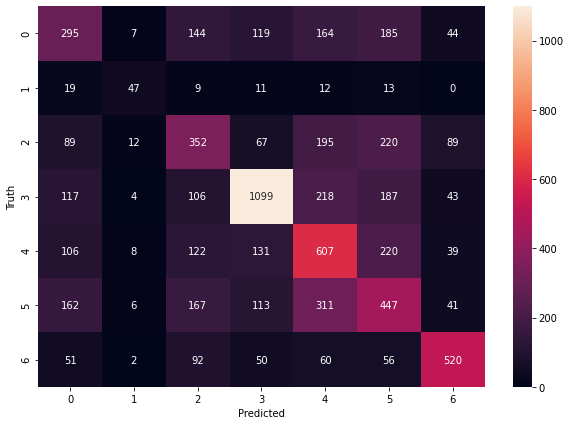

In [41]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_classes)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [42]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.35      0.31      0.33       958
           1       0.55      0.42      0.48       111
           2       0.35      0.34      0.35      1024
           3       0.69      0.62      0.65      1774
           4       0.39      0.49      0.43      1233
           5       0.34      0.36      0.35      1247
           6       0.67      0.63      0.65       831

    accuracy                           0.47      7178
   macro avg       0.48      0.45      0.46      7178
weighted avg       0.48      0.47      0.47      7178



In [6]:
from keras.models import model_from_json

In [73]:
#custom_model_json = model.to_json()
#with open("custom_model.json","w") as json_file:
#    json_file.write(custom_model_json)
#model.save_weights("custom_model.h5")
#print("Saved model to disk")

Saved model to disk


# Model 2

In [43]:
model_1 = tf.keras.applications.MobileNetV2() # Pre Trained Model

In [44]:
model_1.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [45]:
base_input = model_1.layers[0].input

In [46]:
base_output = model_1.layers[-2].output

In [47]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [48]:
final_output = layers.Dense(128)(base_output) # adding new layer after the output of global pooling
final_output = layers.Activation('relu')(final_output) # activation function
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7,activation='softmax')(final_output) # my classes are 7

In [49]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_6')>

In [50]:
new_model = keras.Model(inputs=base_input, outputs=final_output)

In [51]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [52]:
new_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [54]:
new_model.fit(X,y,epochs=10)

Epoch 1/10
898/898 [==============================] - 3581s 4s/step - loss: 1.2404 - accuracy: 0.5270
Epoch 2/10
898/898 [==============================] - 3534s 4s/step - loss: 1.0683 - accuracy: 0.6005
Epoch 3/10
898/898 [==============================] - 3533s 4s/step - loss: 0.9932 - accuracy: 0.6277
Epoch 4/10
898/898 [==============================] - 3530s 4s/step - loss: 0.9369 - accuracy: 0.6533
Epoch 5/10
898/898 [==============================] - 3544s 4s/step - loss: 0.8862 - accuracy: 0.6706
Epoch 6/10
898/898 [==============================] - 3529s 4s/step - loss: 0.8348 - accuracy: 0.6892
Epoch 7/10
898/898 [==============================] - 3521s 4s/step - loss: 0.7878 - accuracy: 0.7083
Epoch 8/10
898/898 [==============================] - 3518s 4s/step - loss: 0.7353 - accuracy: 0.7289
Epoch 9/10
898/898 [==============================] - 3527s 4s/step - loss: 0.6864 - accuracy: 0.7466
Epoch 10/10
898/898 [==============================] - 3522s 4s/step - loss: 0.633

In [55]:
new_model.evaluate(X_test, y_test)

225/225 [==============================] - 172s 753ms/step - loss: 1.7367 - accuracy: 0.5474


[1.7366628646850586, 0.5473669767379761]

In [56]:
y_pred_1 = new_model.predict(X_test)
y_pred_1[:5]

array([[9.9124545e-01, 1.7946044e-05, 2.6294035e-03, 2.8766422e-03,
        2.2007967e-03, 3.3453701e-04, 6.9524843e-04],
       [9.9996698e-01, 1.1270211e-09, 5.6063618e-06, 2.6319738e-05,
        4.5085403e-07, 5.1467941e-07, 6.3877899e-08],
       [7.8209341e-02, 4.3147389e-05, 1.1794999e-01, 2.1272055e-03,
        7.3827682e-03, 4.5269853e-03, 7.8976059e-01],
       [8.4401490e-06, 1.8002488e-09, 9.9996638e-01, 5.9772837e-08,
        2.7903178e-07, 1.2592432e-05, 1.2217650e-05],
       [3.6329678e-01, 5.8628193e-06, 1.2821174e-03, 6.3049954e-01,
        4.3359990e-03, 4.9442030e-04, 8.5257772e-05]], dtype=float32)

In [57]:
y_classes_1 = [np.argmax(element) for element in y_pred_1]
y_classes_1[:10]

[0, 0, 6, 2, 3, 0, 4, 2, 4, 4]

In [58]:
y_test[:10]

array([1, 0, 2, 2, 3, 0, 4, 2, 6, 4])

Text(69.0, 0.5, 'Truth')

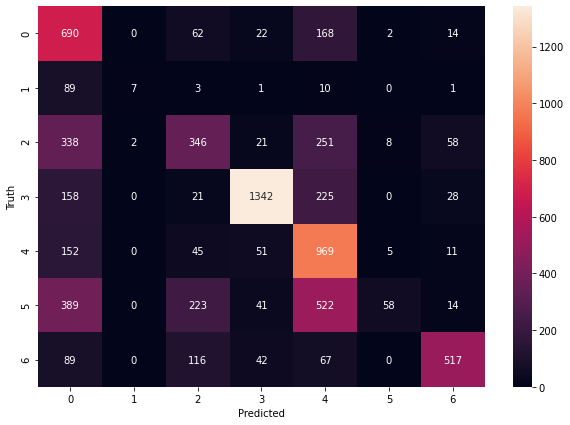

In [59]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_classes_1)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [60]:
print("Classification Report: \n", classification_report(y_test, y_classes_1))

Classification Report: 
               precision    recall  f1-score   support

           0       0.36      0.72      0.48       958
           1       0.78      0.06      0.12       111
           2       0.42      0.34      0.38      1024
           3       0.88      0.76      0.81      1774
           4       0.44      0.79      0.56      1233
           5       0.79      0.05      0.09      1247
           6       0.80      0.62      0.70       831

    accuracy                           0.55      7178
   macro avg       0.64      0.48      0.45      7178
weighted avg       0.65      0.55      0.51      7178



In [74]:
#pretrained_model_json = new_model.to_json()
#with open("pretrained_model.json","w") as json_file:
#    json_file.write(pretrained_model_json)
#new_model.save_weights("pretrained_model.h5")
#print("Saved model to disk")

Saved model to disk


In [76]:
pretrained_model = model_from_json(open("pretrained_model.json", "r").read())
pretrained_model.load_weights('pretrained_model.h5')
pretrained_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

# Webcam Implementation

In [38]:
loaded_model = model_from_json(open("custom_model.json", "r").read())
loaded_model.load_weights('custom_model.h5')

In [39]:
frame = cv2.imread("happyboy.jpg")

In [40]:
frame.shape

(1638, 1200, 3)

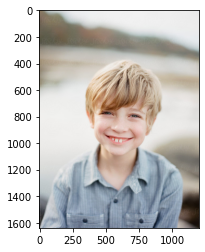

In [41]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [42]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [43]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [44]:
gray.shape

(1638, 1200)

In [45]:
#face_roi
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = frame[y:y+h,x:x+w]
    cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("Face not detected")
    else:
        for(ex,ey,ew,eh) in facess:
            face_roi = roi_color[ey:ey+eh,ex:ex+ew]
        

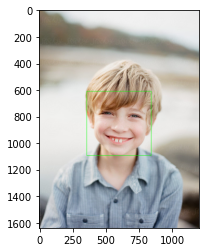

In [46]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

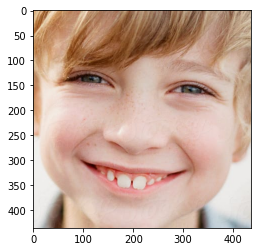

In [47]:
plt.imshow(cv2.cvtColor(face_roi,cv2.COLOR_BGR2RGB))

In [48]:
final_image = cv2.resize(face_roi,(224,224))
final_image = np.expand_dims(final_image,axis = 0)
final_image = final_image / 255.0

In [49]:
Predictions_custom = loaded_model.predict(final_image)

In [50]:
Predictions_custom[0]

array([0.19613965, 0.00070648, 0.05196293, 0.03587505, 0.17270249,
       0.5387584 , 0.0038551 ], dtype=float32)

In [51]:
np.argmax(Predictions_custom)

5

## Realtime Demo

In [53]:
import cv2
path = 'haarcascade_frontalface_default.xml'
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

rectangle_bgr = (255,255,255)

img = np.zeros((500,500))

text = 'Some text in a box!'

(text_width,text_height) = cv2.getTextSize(text,font,fontScale=font_scale,thickness=1)[0]

text_offset_x = 10
text_offset_y = img.shape[0] - 25

box_coords = ((text_offset_x,text_offset_y),(text_offset_x + text_width + 2,text_offset_y - text_height - 2))
cv2.rectangle(img,box_coords[0],box_coords[1],rectangle_bgr,cv2.FILLED)
cv2.putText(img,text,(text_offset_x,text_offset_y),font,fontScale=font_scale,color=(0,0,0),thickness=1)

cap = cv2.VideoCapture()

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
while True:
    ret,frame = cap.read()
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = frame[y:y+h,x:x+w]
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            print("Face not detected")
        else:
            for(ex,ey,ew,eh) in facess:
                face_roi = roi_color[ey:ey+eh,ex:ex+ew]
    final_image = cv2.resize(face_roi,(224,224))
    final_image = np.expand_dims(final_image,axis = 0)  
    final_image = final_image / 255.0
                                                                                                                                                                                                               
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    Predictions_custom = loaded_model.predict(final_image)
    
    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN
    
    if(np.argmax(Predictions_custom) == 0):
        status = "Angry"
        
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
        
    elif(np.argmax(Predictions_custom) == 1):
        status = "Disgust"
        
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
    
    elif(np.argmax(Predictions_custom) == 2):
        status = "Fear"
        
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
        
    elif(np.argmax(Predictions_custom) == 3):
        status = "Happy"
        
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
        
    elif(np.argmax(Predictions_custom) == 4):
        status = "Sad"
        
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
        
    elif(np.argmax(Predictions_custom) == 5):
        status = "Surprise"
        
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
    
    else:
        status = "Neutral"
        
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
    
    cv2.imshow('Face Emotion Recognition',frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()